In [1]:
# Pandas is one of the open source Python libraries,
# that provide user-friendly data structures and enable data analysis.
import pandas as pd

# NumPy (Numerical Python) is a math library,
# with which we can quickly perform scientific calculations.
import numpy as np

# Python Matplotlib; matplotlib.pyplot is a Python library used for 2D or 3D graphics.
import matplotlib.pyplot as plt

# Seaborn is a library in Python used to create interesting and informative statistical graphs.
import seaborn as sns

import warnings

# It is a graphic creation module.
import plotly.express as px

import plotly.figure_factory as ff

import plotly.graph_objs as go

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import roc_curve,accuracy_score,plot_confusion_matrix


# We import our data set.
dataset = pd.read_csv(r"D:\CEREN\Dataset.csv")

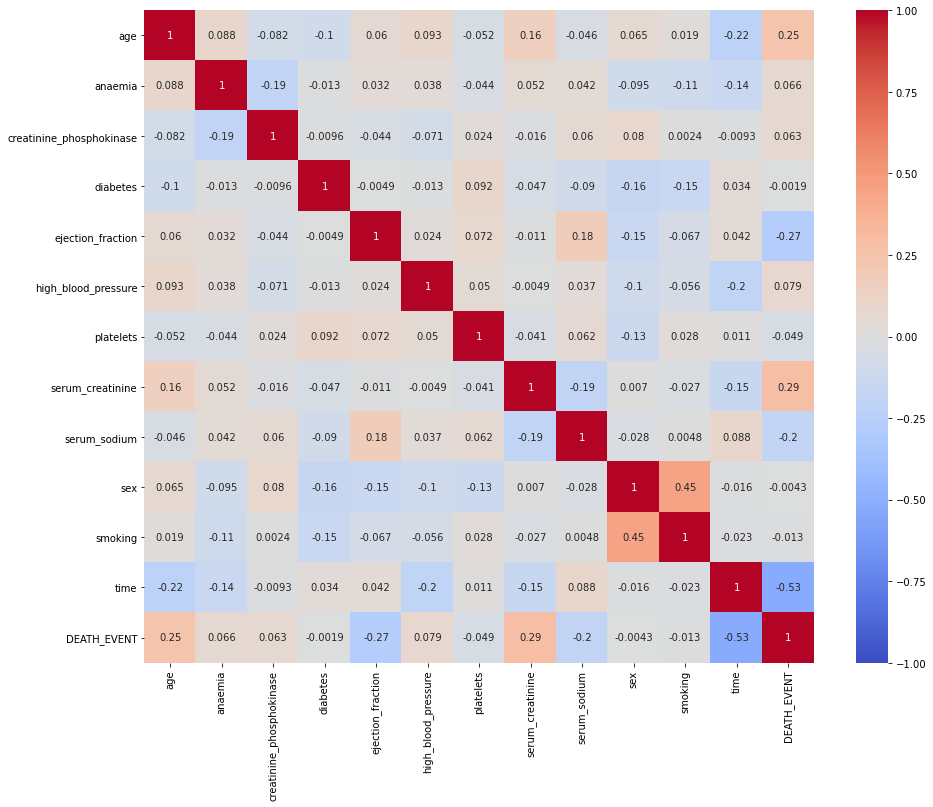

In [2]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [3]:
dataset.corr()['DEATH_EVENT'].apply(np.abs).sort_values(ascending=False)

DEATH_EVENT                 1.000000
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: DEATH_EVENT, dtype: float64

## Random Forest

In [4]:
Features = ['ejection_fraction','serum_creatinine','age','serum_sodium','high_blood_pressure']
x = dataset[Features]
y = dataset["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)

In [5]:
print("x_train Shape : ", x_train.shape)
print("X_test Shape  : ", x_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

x_train Shape :  (239, 5)
X_test Shape  :  (60, 5)
y_train Shape :  (239,)
y_test Shape  :  (60,)


In [6]:
clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)

In [7]:
print("Accuracy of RandomForestClassifier is /Train set: ",clf.score(x_train,y_train))
print("Accuracy of RandomForestClassifier is /Test set : ",clf.score(x_test,y_test))

Accuracy of RandomForestClassifier is /Train set:  1.0
Accuracy of RandomForestClassifier is /Test set :  0.85


<Figure size 432x288 with 0 Axes>

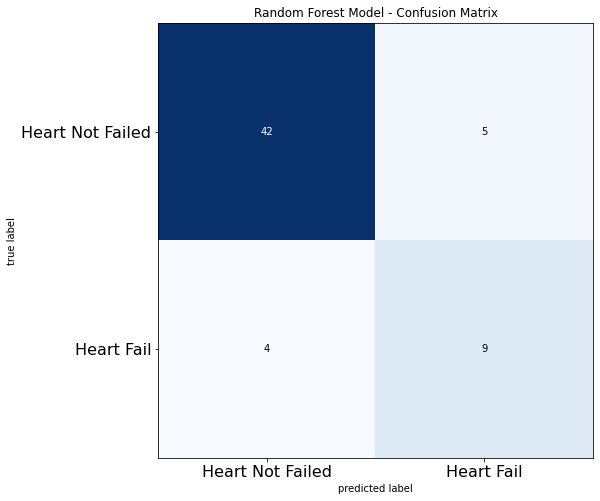

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

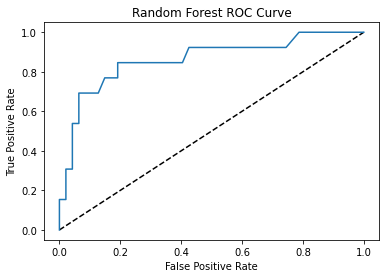

In [9]:
model = RandomForestClassifier(min_samples_split=2, class_weight={0:2,1:7}, random_state=13)
model.fit(x_train, y_train)
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()